# Libraries

In [3]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import chardet

In [4]:
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString
import folium 
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap

In [2]:
pwd

'/Users/ricardo/Documents/GitHub/Hospitals-Access-Peru/code'

# Reading, handling and processing IPRESS.csv

In [5]:
base = open('../data/IPRESS.csv', 'rb').read()
det = chardet.detect(base)
charenc = det['encoding']
charenc

'MacRoman'

In [34]:
csv_data = pd.read_csv('../data/IPRESS.csv', encoding=charenc)


In [35]:
#csv_data = csv_data[['UBIGEO','InstituciÛn', 'Nombre del establecimiento', 'ClasificaciÛn', 'Departamento', 'Provincia', 'Distrito', 'Estado' ,'NORTE' ,'ESTE']]
csv_data.rename(columns={'InstituciÛn':'INSTITUCIÓN', 'Nombre del establecimiento': 'NOMBRE DEL ESTABLECIMIENTO', 'ClasificaciÛn':'CLASIFICACION', 'Departamento':'DEPARTAMENTO', 'Provincia':'PROVINCIA', 'Distrito':'DISTRITO', 'Estado':'ESTADO' ,'NORTE':'LATITUD' ,'ESTE':'LONGITUD'}, inplace=True)
cleaned_csv = csv_data.loc[csv_data['ESTADO'] == 'ACTIVADO'].dropna(subset=['LATITUD', 'LONGITUD'])
cleaned_csv.head()

,INSTITUCIÓN,CÛdigo ⁄nico,NOMBRE DEL ESTABLECIMIENTO,CLASIFICACION,Tipo,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,DirecciÛn,...,Inicio de Actividad,Director MÈdico y/o Responsable de la AtenciÛn de Salud,ESTADO,SituaciÛn,CondiciÛn,InspecciÛn,LATITUD,LONGITUD,COTA,CAMAS
1,GOBIERNO REGIONAL,7050,AMBATO,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,CAJAMARCA,CUTERVO,SANTA CRUZ,60611,COMUNIDAD DE AMBATO,...,29/06/2006,IDELSO MENOR CHAVEZ,ACTIVADO,,EN FUNCIONAMIENTO,,-78.858380,-6.133523,1724.0,NaN
2,GOBIERNO REGIONAL,99,SANTA ISABEL DE YUMBATURO,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LORETO,LORETO,PARINARI,160302,ACTUALIZAR,...,01/01/1900,JULIO TONY CAITIMARI MACHOA,ACTIVADO,,EN FUNCIONAMIENTO,,-74.258139,-4.581509,124.0,NaN
6,MINSA,7278,PUESTO DE SALUD HEROES DEL CENEPA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LIMA,LIMA,VILLA EL SALVADOR,150142,"JR. HEROES DEL CENEPA MZ C LT 20, ALT DE PANAM...",...,01/02/2008,BASTIDAS CAMARENA HUBERT ALEX . .,ACTIVADO,,EN FUNCIONAMIENTO,,-76.930608,-12.248699,NaN,NaN
12,GOBIERNO REGIONAL,5460,NUEVA BETANIA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,UCAYALI,CORONEL PORTILLO,CALLERIA,250101,OTROS CC.NN. NUEVA BETANIA S/N N⁄MERO S/N DIST...,...,20/12/2000,MARIANA VASQUEZ PINEDO,ACTIVADO,,EN FUNCIONAMIENTO,,-74.296531,-8.398366,177.0,NaN
15,GOBIERNO REGIONAL,6431,PONGO ISLA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,SAN MARTIN,SAN MARTIN,HUIMBAYOC,220907,OTROS CP PONGO ISLA DISTRITO HUIMBAYOC PROVINC...,...,14/09/2001,MIRLANDA MOZOMBITE BARDALES,ACTIVADO,,EN FUNCIONAMIENTO,,-75.885812,-6.438298,172.1,NaN


In [36]:
cleaned_csv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7956 entries, 1 to 20818
Data columns (total 33 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   INSTITUCIÓN                                              7956 non-null   object 
 1   CÛdigo ⁄nico                                             7956 non-null   int64  
 2   NOMBRE DEL ESTABLECIMIENTO                               7956 non-null   object 
 3   CLASIFICACION                                            7951 non-null   object 
 4   Tipo                                                     7956 non-null   object 
 5   DEPARTAMENTO                                             7956 non-null   object 
 6   PROVINCIA                                                7956 non-null   object 
 7   DISTRITO                                                 7956 non-null   object 
 8   UBIGEO                          

# Distritos Shape file 

In [37]:
maps = gpd.read_file('../data/distritos/DISTRITOS.shp')
maps = maps[['IDDIST', 'geometry']]
maps = maps.rename({'IDDIST':'UBIGEO'}, axis = 1 )
maps['UBIGEO'] = maps['UBIGEO'].astype(str).astype(int)
maps

,UBIGEO,geometry
0,100902,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297..."
1,100904,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828..."
2,250305,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742..."
3,250302,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569..."
4,250304,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446..."
...,...,...
1868,100608,"POLYGON ((-76.08083 -9.13017, -76.08026 -9.130..."
1869,100609,"POLYGON ((-75.88828 -9.00906, -75.88756 -9.010..."
1870,100610,"POLYGON ((-75.91141 -8.88593, -75.91182 -8.886..."
1871,211105,"POLYGON ((-70.13203 -15.33382, -70.12355 -15.3..."


#### Making sure the format is WGS-84 (EPSG:4326)

In [38]:
maps = maps.to_crs(epsg=4326)
maps.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### Merged data

In [39]:
final_dataset = pd.merge(maps, cleaned_csv, how="inner", on="UBIGEO")
final_dataset

,UBIGEO,geometry,INSTITUCIÓN,CÛdigo ⁄nico,NOMBRE DEL ESTABLECIMIENTO,CLASIFICACION,Tipo,DEPARTAMENTO,PROVINCIA,DISTRITO,...,Inicio de Actividad,Director MÈdico y/o Responsable de la AtenciÛn de Salud,ESTADO,SituaciÛn,CondiciÛn,InspecciÛn,LATITUD,LONGITUD,COTA,CAMAS
0,100902,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...",GOBIERNO REGIONAL,927,CODO DEL POZUZO,CENTROS DE SALUD O CENTROS MEDICOS,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,HUANUCO,PUERTO INCA,CODO DEL POZUZO,...,08/06/2004,HENRY ROJAS CASTA—EDA,ACTIVADO,,EN FUNCIONAMIENTO,,-75.463665,-9.669402,NaN,NaN
1,100902,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...",GOBIERNO REGIONAL,1106,HUAMPOMAYO,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,HUANUCO,PUERTO INCA,CODO DEL POZUZO,...,02/02/2001,JESSICA MABEL PI—AN PAREDES,ACTIVADO,,EN FUNCIONAMIENTO,,-75.591200,-9.969250,1600.0,NaN
2,100902,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...",GOBIERNO REGIONAL,930,CHORROPAMPA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,HUANUCO,PUERTO INCA,CODO DEL POZUZO,...,08/06/2004,VICTOR RAUL PONCIANO ESTELA,ACTIVADO,,EN FUNCIONAMIENTO,,-75.394620,-9.850610,320.0,NaN
3,100904,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828...",GOBIERNO REGIONAL,916,PRINCIPE DE PAZ,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,HUANUCO,PUERTO INCA,TOURNAVISTA,...,14/09/1994,JESUS MANUEL RAFAEL ESPINOZA,ACTIVADO,,EN FUNCIONAMIENTO,,-74.683542,-8.995790,273.7,NaN
4,100904,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828...",GOBIERNO REGIONAL,912,TOURNAVISTA,CENTROS DE SALUD O CENTROS MEDICOS,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,HUANUCO,PUERTO INCA,TOURNAVISTA,...,31/05/1994,ROCIO CAMPOS CERRON,ACTIVADO,,EN FUNCIONAMIENTO,,-74.702805,-8.934338,206.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7903,150806,"POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...",GOBIERNO REGIONAL,5685,PE—ICO,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LIMA,HUAURA,HUAURA,...,01/01/1900,EDY ELODIA MARIN GARCIA,ACTIVADO,,EN FUNCIONAMIENTO,,-77.437500,-10.931177,594.0,NaN
7904,150806,"POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...",ESSALUD,10392,CENTRO DE ATENCION PRIMARIA I HUMAYA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LIMA,HUAURA,HUAURA,...,15/02/1944,JAVIER IVAN HENOSTROZA CACERES,ACTIVADO,,EN FUNCIONAMIENTO,,-77.409616,-11.098534,NaN,NaN
7905,150806,"POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...",GOBIERNO REGIONAL,5684,VILCAHUAURA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LIMA,HUAURA,HUAURA,...,01/01/1900,MARIA VICTORIA ECHENIQUE GARCIA,ACTIVADO,,EN FUNCIONAMIENTO,,-77.474190,-11.072751,264.0,NaN
7906,150806,"POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...",GOBIERNO REGIONAL,5683,HUMAYA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LIMA,HUAURA,HUAURA,...,06/11/1996,MIRTHA MARY CALDERON BARRETO,ACTIVADO,,EN FUNCIONAMIENTO,,-77.409943,-11.099675,NaN,NaN


In [40]:
### borrar despues
final_dataset['INSTITUCIÓN'].value_counts()

INSTITUCIÓN
GOBIERNO REGIONAL                          7092
MINSA                                       394
ESSALUD                                     194
PRIVADO                                     167
SANIDAD DEL EJERCITO DEL PERU                25
SANIDAD DE LA POLICIA NACIONAL DEL PERU      13
SANIDAD DE LA FUERZA AEREA DEL PERU          10
SANIDAD DE LA MARINA DE GUERRA DEL PERU       6
MUNICIPALIDAD PROVINCIAL                      4
INPE                                          1
MUNICIPALIDAD DISTRITAL                       1
OTRO                                          1
Name: count, dtype: int64

In [41]:
# borrar despues 

final_dataset.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7908 entries, 0 to 7907
Data columns (total 34 columns):
 #   Column                                                   Non-Null Count  Dtype   
---  ------                                                   --------------  -----   
 0   UBIGEO                                                   7908 non-null   int64   
 1   geometry                                                 7908 non-null   geometry
 2   INSTITUCIÓN                                              7908 non-null   object  
 3   CÛdigo ⁄nico                                             7908 non-null   int64   
 4   NOMBRE DEL ESTABLECIMIENTO                               7908 non-null   object  
 5   CLASIFICACION                                            7903 non-null   object  
 6   Tipo                                                     7908 non-null   object  
 7   DEPARTAMENTO                                             7908 non-null   object  
 8   PROVINCIA 

# Task 1: Static maps: count of hospitals by district

# Function to filter dataset_covid by year, month and administrative space(province)

def subdata( a , b, c ):
    
    if c == "All-Peru":
        
        resultado = dataset_cv_balanced.loc[(dataset_cv_balanced['Año']== a) & (dataset_cv_balanced['Mes']== b)]
    else:
        resultado = dataset_cv_balanced.loc[(dataset_cv_balanced['Año']== a) & (dataset_cv_balanced['Mes']== b) & (dataset_cv_balanced['Provincia']== c)]
    return resultado  

In [55]:
def tmap_1 (c):
    if c == 'all-peru':
        result = final_dataset.loc[(final_dataset['INSTITUCIÓN'] != 'PRIVADO') & (final_dataset['INSTITUCIÓN'] != 'OTRO')]
    else:
        result = final_dataset.loc[(final_dataset['INSTITUCIÓN'] != 'PRIVADO') & (final_dataset['INSTITUCIÓN'] != 'OTRO') & (final_dataset['DISTRITO'] == c)]
    return result

In [66]:
x = tmap_1('all-peru')

In [ ]:
x['LATITUD'].isna().sum()

0

In [69]:
y['LATITUD'].isna().sum()

0

In [68]:
y = final_dataset.loc[(final_dataset['INSTITUCIÓN'] != 'PRIVADO') & (final_dataset['INSTITUCIÓN'] != 'OTRO')]

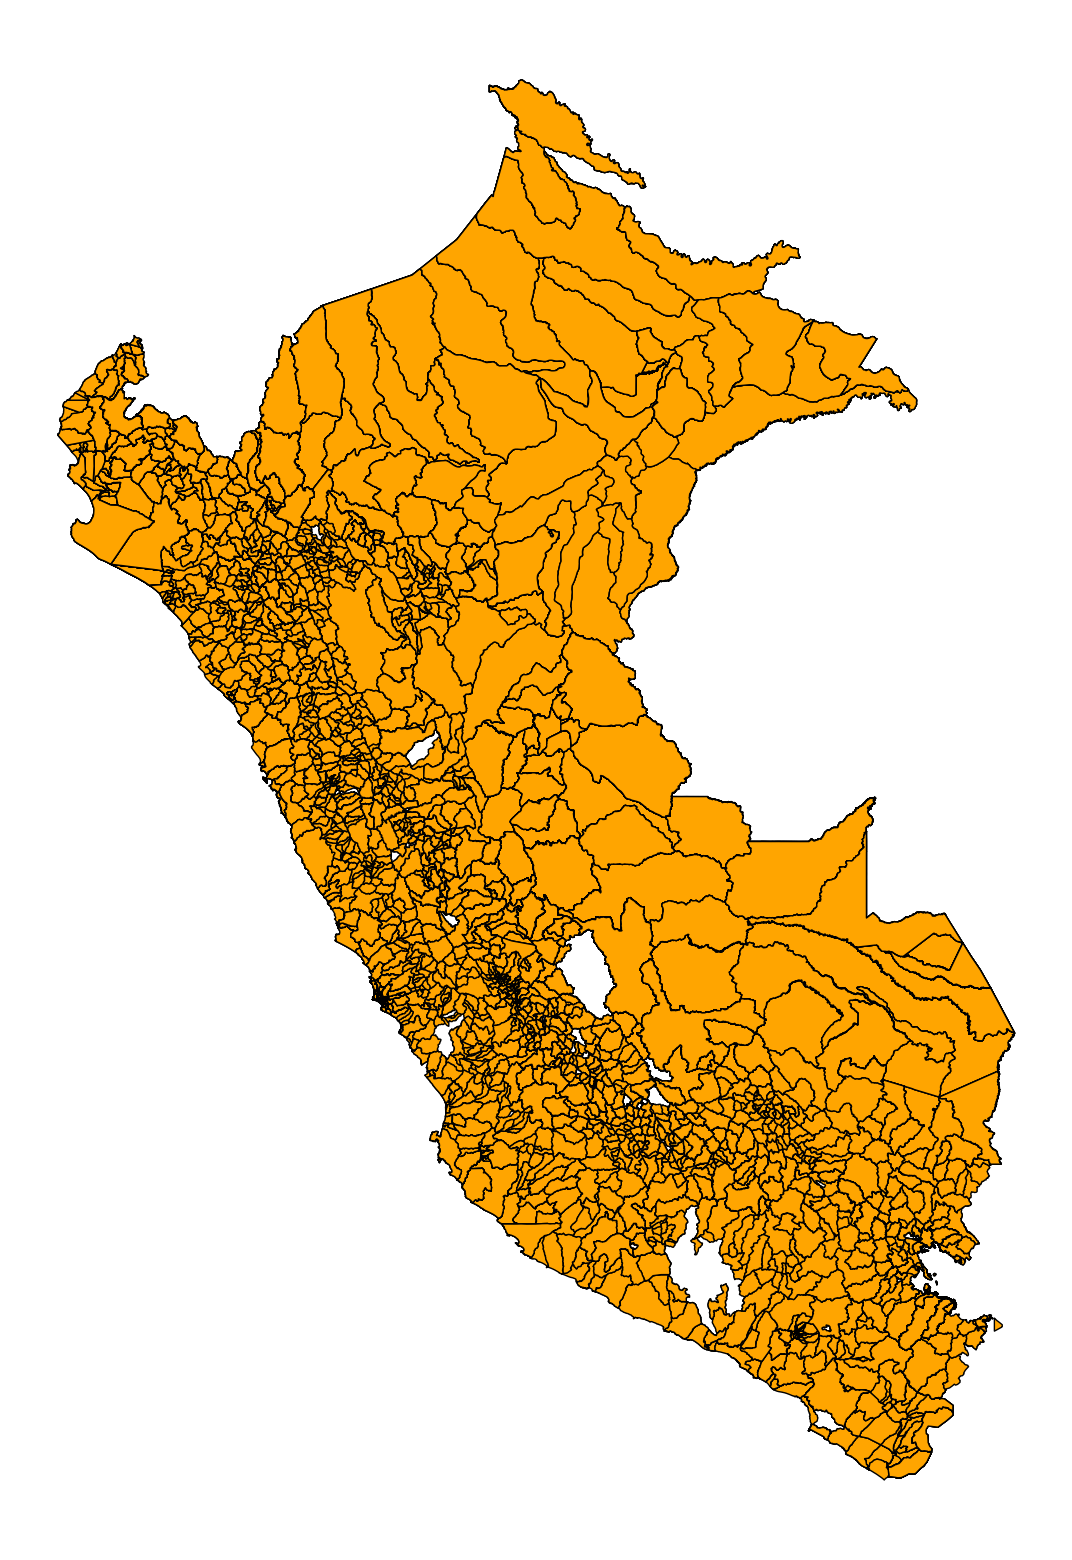

In [71]:
fig, ax = plt.subplots(figsize=(20, 20))
x.plot(ax=ax,color='orange', linestyle='-',
                      edgecolor='black')
ax.set_axis_off()